In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [102]:
df = pd.read_csv('rail.csv')

In [103]:
df

,Train,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Rajdhani_Express,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,389
1,Vande_Bharat_Express,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,766
2,Rajdhani_Express,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,1388
3,Rajdhani_Express,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,621
4,Rajdhani_Express,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,1330
...,...,...,...,...,...,...,...,...,...,...,...
10678,Garib_Rath,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,410
10679,Vande_Bharat_Express,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,414
10680,Rajdhani_Express,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,722
10681,Tejas_Express,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,1264


In [104]:
df.iloc[:, 0].unique()

array(['Rajdhani_Express', 'Vande_Bharat_Express', 'Humsafar_Express',
       'Sampark_Kranti_Express', 'Shatabdi_Express', 'Tejas_Express',
       'Garib_Rath', 'Jan_Shatabdi_Express', 'Yuva_Express',
       'Uday_Express', 'Mahamana_Express'], dtype=object)

In [105]:
df.describe()

,Price
count,10683.000000
mean,908.256763
std,461.138915
min,175.000000
25%,527.000000
50%,837.000000
75%,1237.000000
max,7951.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Train            10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [107]:
df.columns[0]

'Train'

In [108]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 
         'Duration', 'Total_Stops', 'Additional_Info', 'Route'], axis=1, inplace=True)

In [109]:
df

,Train,Source,Destination,Price
0,Rajdhani_Express,Banglore,New Delhi,389
1,Vande_Bharat_Express,Kolkata,Banglore,766
2,Rajdhani_Express,Delhi,Cochin,1388
3,Rajdhani_Express,Kolkata,Banglore,621
4,Rajdhani_Express,Banglore,New Delhi,1330
...,...,...,...,...
10678,Garib_Rath,Kolkata,Banglore,410
10679,Vande_Bharat_Express,Kolkata,Banglore,414
10680,Rajdhani_Express,Banglore,Delhi,722
10681,Tejas_Express,Banglore,New Delhi,1264


In [110]:
df.loc[df["Source"] == "Mumbai"]

,Train,Source,Destination,Price
59,Tejas_Express,Mumbai,Hyderabad,1239
67,Vande_Bharat_Express,Mumbai,Hyderabad,362
70,Rajdhani_Express,Mumbai,Hyderabad,567
77,Rajdhani_Express,Mumbai,Hyderabad,404
98,Rajdhani_Express,Mumbai,Hyderabad,804
...,...,...,...,...
10611,Rajdhani_Express,Mumbai,Hyderabad,405
10617,Rajdhani_Express,Mumbai,Hyderabad,275
10655,Rajdhani_Express,Mumbai,Hyderabad,567
10671,Vande_Bharat_Express,Mumbai,Hyderabad,310


In [111]:
for i in range(3):
    print(df.columns[i])
    print(df.iloc[:, i].unique())
    print("________------------------------------------------------------------------__________")

Train
['Rajdhani_Express' 'Vande_Bharat_Express' 'Humsafar_Express'
 'Sampark_Kranti_Express' 'Shatabdi_Express' 'Tejas_Express' 'Garib_Rath'
 'Jan_Shatabdi_Express' 'Yuva_Express' 'Uday_Express' 'Mahamana_Express']
________------------------------------------------------------------------__________
Source
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
________------------------------------------------------------------------__________
Destination
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
________------------------------------------------------------------------__________


In [112]:
df.isnull().sum()

Train          0
Source         0
Destination    0
Price          0
dtype: int64

In [113]:
df.head()

,Train,Source,Destination,Price
0,Rajdhani_Express,Banglore,New Delhi,389
1,Vande_Bharat_Express,Kolkata,Banglore,766
2,Rajdhani_Express,Delhi,Cochin,1388
3,Rajdhani_Express,Kolkata,Banglore,621
4,Rajdhani_Express,Banglore,New Delhi,1330


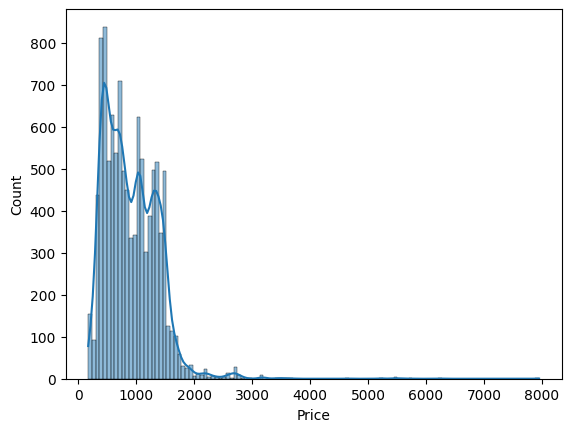

In [114]:
sns.histplot(df.Price, kde=1)
plt.show()

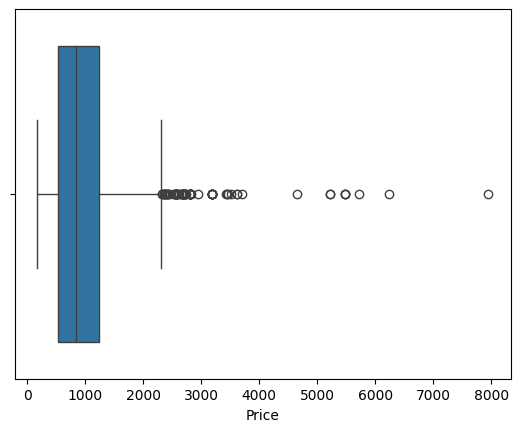

In [115]:
sns.boxplot(x='Price', data=df)
plt.show()

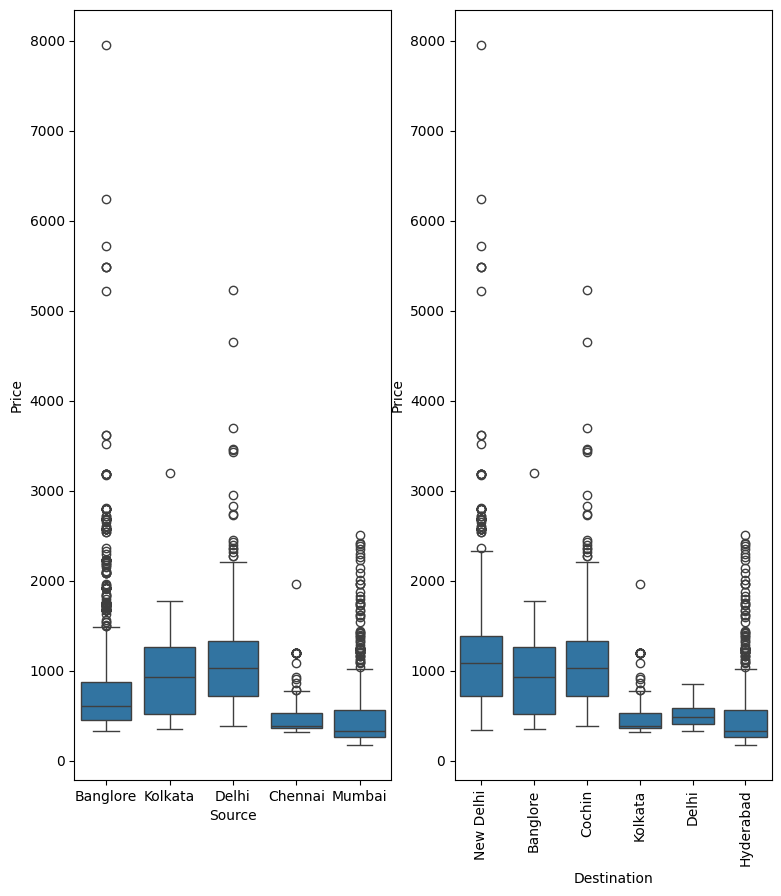

In [116]:
plt.figure(figsize=(9,10))

plt.subplot(1,2,1)
sns.boxplot(x='Source', y='Price', data=df)
plt.subplot(1,2,2)
sns.boxplot(x='Destination', y='Price', data=df)

plt.xticks(rotation=90)
plt.show()

In [117]:
# final_dataset=pd.get_dummies(df,drop_first=True,dtype="int")
final_dataset = pd.get_dummies(df, drop_first=False, dtype="int")

In [118]:
final_dataset

,Price,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,389,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,766,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1388,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,621,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1330,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,410,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,414,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10680,722,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,1264,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [119]:
final_dataset.corr()

,Price,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Price,1.000000,-0.133016,-0.296539,-0.000458,-0.010371,0.115673,0.139733,-0.095169,-0.060647,0.017635,...,-0.179229,0.270583,0.009437,-0.230742,0.009437,0.270583,-0.313431,-0.230742,-0.179229,0.189795
Train_Garib_Rath,-0.133016,1.000000,-0.050520,-0.002940,-0.001697,-0.194927,-0.062292,-0.023860,-0.038011,-0.006124,...,-0.033739,-0.061726,0.079735,-0.046350,0.079735,-0.061726,0.056558,-0.046350,-0.033739,-0.019158
Train_Humsafar_Express,-0.296539,-0.050520,1.000000,-0.004826,-0.002786,-0.319940,-0.102242,-0.039162,-0.062389,-0.010051,...,0.187594,-0.185450,0.063660,0.097830,0.063660,-0.185450,0.043733,0.097830,0.187594,-0.034136
Train_Jan_Shatabdi_Express,-0.000458,-0.002940,-0.004826,1.000000,-0.000162,-0.018622,-0.005951,-0.002279,-0.003631,-0.000585,...,0.026902,-0.014400,-0.010160,-0.004428,-0.010160,-0.014400,0.011149,-0.004428,0.026902,0.014616
Train_Mahamana_Express,-0.010371,-0.001697,-0.002786,-0.000162,1.000000,-0.010750,-0.003435,-0.001316,-0.002096,-0.000338,...,-0.001861,-0.008313,-0.005866,0.036623,-0.005866,-0.008313,-0.003546,0.036623,-0.001861,-0.002991
Train_Rajdhani_Express,0.115673,-0.194927,-0.319940,-0.018622,-0.010750,1.000000,-0.394495,-0.151103,-0.240726,-0.038782,...,-0.026890,-0.082089,0.048780,0.022816,0.048780,-0.082089,0.021634,0.022816,-0.026890,0.040094
Train_Sampark_Kranti_Express,0.139733,-0.062292,-0.102242,-0.005951,-0.003435,-0.394495,1.000000,-0.048288,-0.076928,-0.012393,...,-0.068281,0.413250,-0.215247,-0.093804,-0.215247,0.413250,-0.130127,-0.093804,-0.068281,-0.109770
Train_Shatabdi_Express,-0.095169,-0.023860,-0.039162,-0.002279,-0.001316,-0.151103,-0.048288,1.000000,-0.029466,-0.004747,...,-0.026154,-0.009063,-0.042912,-0.035930,-0.042912,-0.009063,0.099867,-0.035930,-0.026154,0.017576
Train_Tejas_Express,-0.060647,-0.038011,-0.062389,-0.003631,-0.002096,-0.240726,-0.076928,-0.029466,1.000000,-0.007563,...,0.063212,-0.144975,0.055375,-0.015114,0.055375,-0.144975,0.103990,-0.015114,0.063212,0.019574
Train_Uday_Express,0.017635,-0.006124,-0.010051,-0.000585,-0.000338,-0.038782,-0.012393,-0.004747,-0.007563,1.000000,...,-0.006713,0.040626,-0.021160,-0.009222,-0.021160,0.040626,-0.012792,-0.009222,-0.006713,-0.010791


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

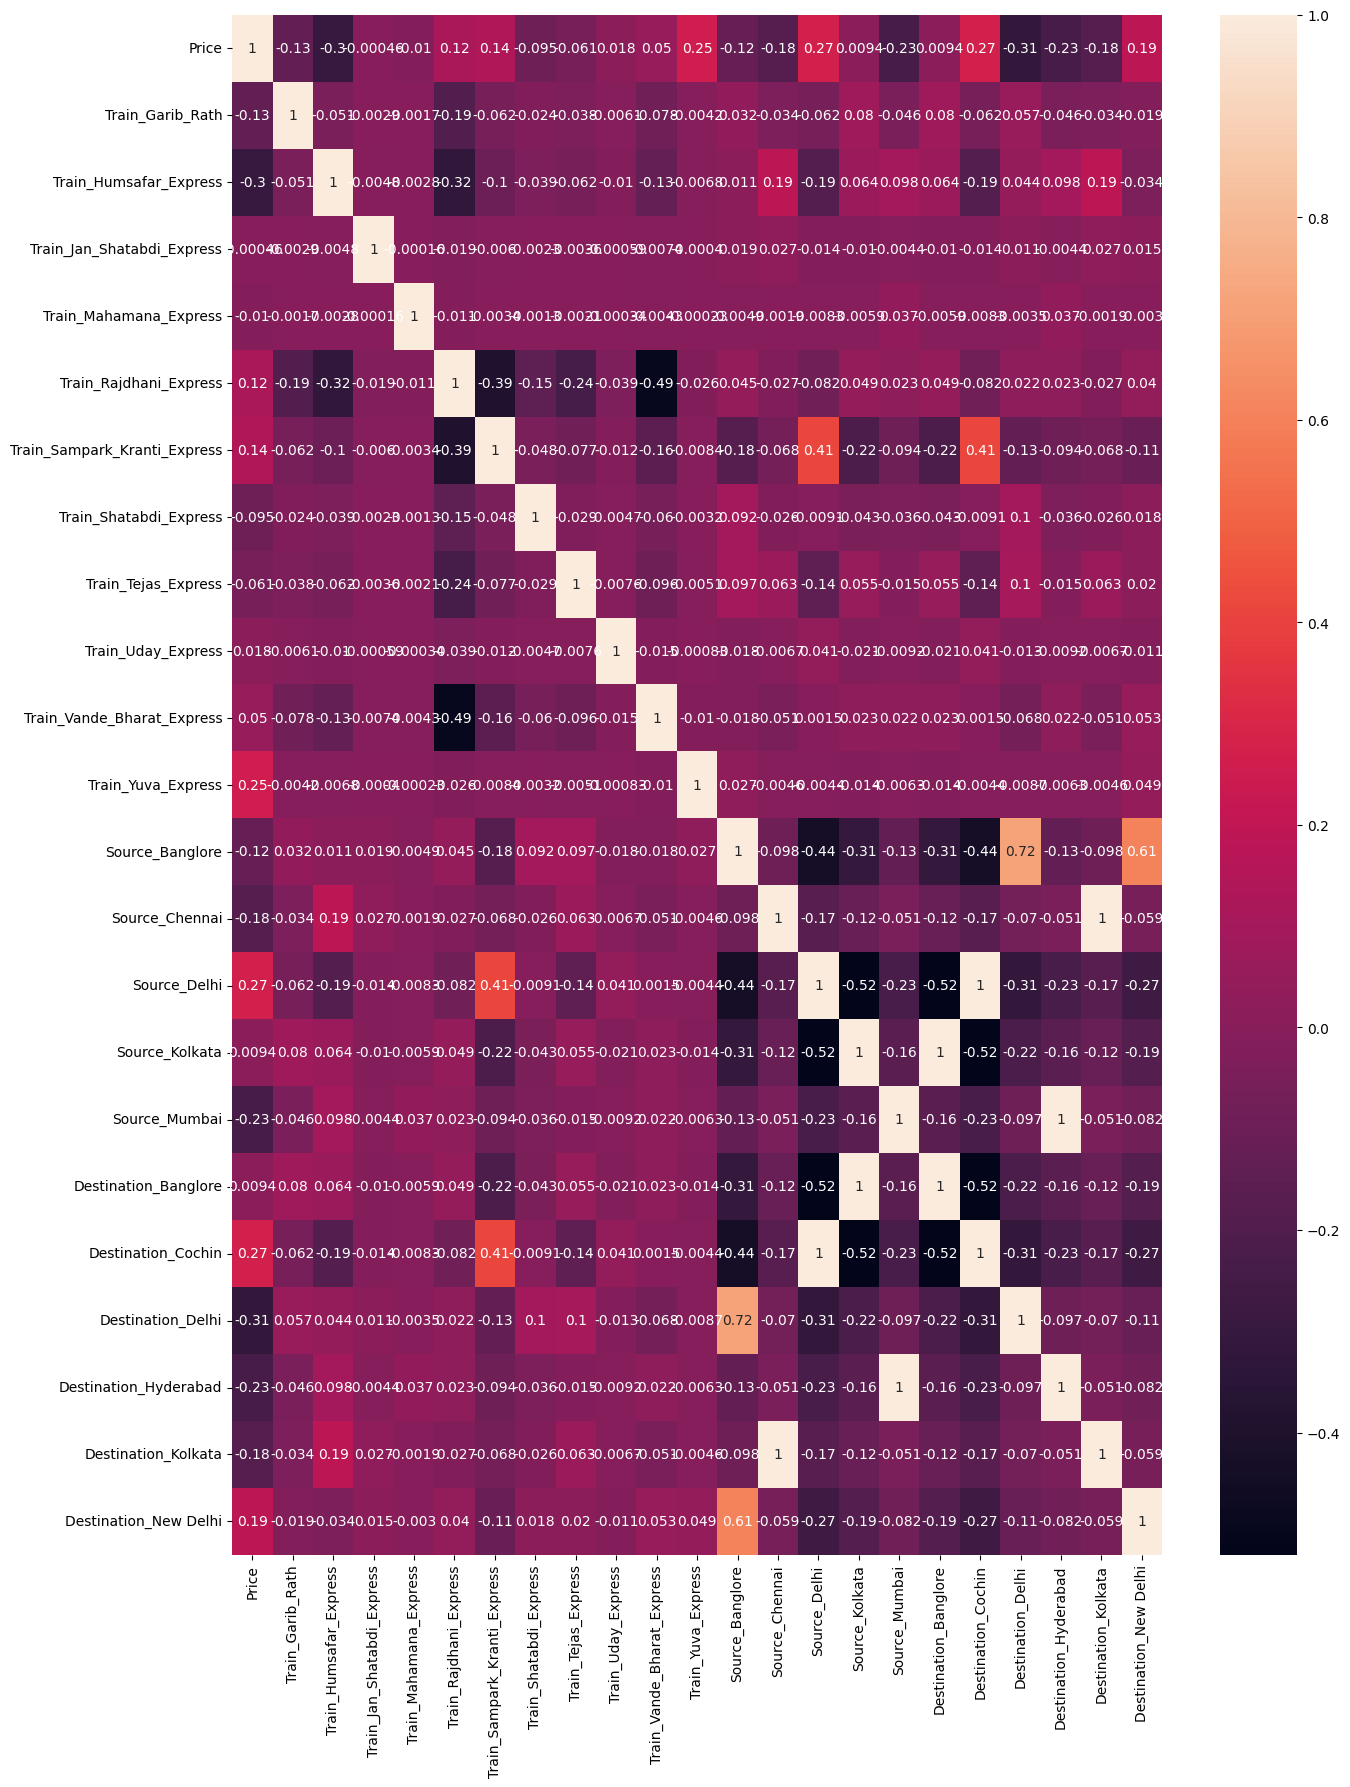

In [121]:
plt.figure(figsize=(15,20))
sns.heatmap(final_dataset.corr(),annot=True)

In [122]:
final_dataset

,Price,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,389,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,766,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1388,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,621,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1330,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,410,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,414,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10680,722,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,1264,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [123]:
X=final_dataset.iloc[:,1:]
y=final_dataset.Price

In [124]:
X

,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,Train_Vande_Bharat_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
10680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [125]:
y

0         389
1         766
2        1388
3         621
4        1330
         ... 
10678     410
10679     414
10680     722
10681    1264
10682    1175
Name: Price, Length: 10683, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
from sklearn.ensemble import RandomForestRegressor

In [128]:
regressor=RandomForestRegressor()

In [129]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [130]:
y_pred = regressor.predict(X_test)

In [131]:
from sklearn.metrics import r2_score,mean_squared_error

In [132]:
r2_score(y_test,y_pred)

0.3428959205206058

In [133]:
mean_squared_error(y_test,y_pred)

139137.05535181827

In [134]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(regressor, file)

In [135]:
file = open('random_forest_regression_model.pkl', 'rb')

# dump information to that file
model = pickle.load(file)

In [136]:
model

RandomForestRegressor()

In [137]:
final_dataset

,Price,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,389,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,766,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,1388,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,621,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1330,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,410,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10679,414,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
10680,722,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10681,1264,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [138]:
X.columns

Index(['Train_Garib_Rath', 'Train_Humsafar_Express',
       'Train_Jan_Shatabdi_Express', 'Train_Mahamana_Express',
       'Train_Rajdhani_Express', 'Train_Sampark_Kranti_Express',
       'Train_Shatabdi_Express', 'Train_Tejas_Express', 'Train_Uday_Express',
       'Train_Vande_Bharat_Express', 'Train_Yuva_Express', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [139]:
X_train

,Train_Garib_Rath,Train_Humsafar_Express,Train_Jan_Shatabdi_Express,Train_Mahamana_Express,Train_Rajdhani_Express,Train_Sampark_Kranti_Express,Train_Shatabdi_Express,Train_Tejas_Express,Train_Uday_Express,Train_Vande_Bharat_Express,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
508,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
3071,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2036,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9686,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4859,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3264,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
9845,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [140]:
X_train.iloc[0].values.reshape(1, -1)

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [141]:
y_train.iloc[0]

934

In [142]:
pre = model.predict([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0]])

In [143]:
pre

array([928.25422223])

In [144]:
output = round(pre[0],2)

In [145]:
output

928.25